# 식료품 연관 규칙 분석

식료품 매장의 거래 데이터에 대해 장바구니 분석을 수행<br>
식료품 매장의 거래 데이터 Kaggle - Groceries Market Basket Dataset

In [74]:
# 필요한 라이브러리 설치

import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## 1. 데이터 수집 및 데이터 탐색과 전처리

In [75]:
grocery = pd.read_csv('../input/groceries/groceries - groceries.csv')
grocery.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


상위 20개의 상품의 지지도 (빈도)를 확인해보자

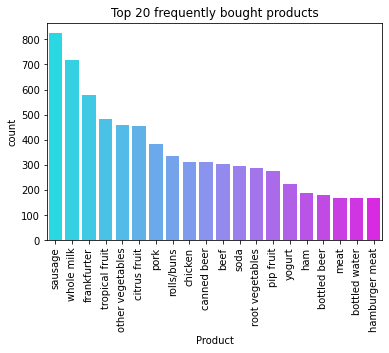

In [76]:
sns.countplot(data=grocery, x=grocery['Item 1'], order = grocery['Item 1'].value_counts().head(20).index, palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

mlxtend 라이브러리를 이용하여 연관 규칙 분석을 수행해야하는데 이를 사용하기 위해서는 각 행별로 품목이 포함되어 있으면 1 아니면 0인 데이터프레임을 만들어주어야한다.

In [77]:
grocery = grocery.drop(columns=['Item(s)'], axis=1)
grocery = pd.get_dummies(grocery, prefix="item")
col_names = []
for col in grocery.columns:
    col_names.append(col.replace('item_', ''))
grocery.columns = col_names
grocery.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,chocolate,hygiene articles,napkins,sugar,cooking chocolate,house keeping products,soups,skin care,hygiene articles,candles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. 연관 규칙 분석 수행

**빈발 품목 집합 구하기**

최소 지지도는 0.006, 최소 신뢰도는 0.25, 품목 집합 최소 품목 개수는 2개로 설정하여 품목 집합을 구한다.
품목 집합을 컬럼 이름으로 진행하고 진행상황을 보기 위해 verbose를 1로 지정한다.

또한, 품목 집합의 개수를 나타내기 위해 length 컬럼을 추가하고 지지도를 기준으로 내림차순하여 나타낸다.

In [78]:
itemset_frequency = apriori(grocery, min_support=0.006, max_len=3,use_colnames=True, verbose=1)

itemset_frequency['length'] = itemset_frequency['itemsets'].map(lambda x: len(x))
itemset_frequency.sort_values('support',ascending=False, inplace=True)
itemset_frequency

Processing 753 combinations | Sampling itemset size 3 2


,support,itemsets,length
26,0.083884,(sausage),1
30,0.072903,(whole milk),1
67,0.066497,(whole milk),1
13,0.058973,(frankfurter),1
56,0.055923,(other vegetables),1
...,...,...,...
49,0.006101,(grapes),1
168,0.006101,"(other vegetables, sausage)",2
182,0.006101,"(butter, whole milk)",2
141,0.006101,(brown bread),1


**연관 규칙을 뽑아내기**

지지도가 0.006 이상인 연관 규칙들 중 향상도가 높은 순으로 연관 규칙을 확인해보자

In [79]:
grocery_rules = association_rules(itemset_frequency, metric="lift", min_threshold=1)
grocery_rules.sort_values('lift',ascending=False, inplace=True)
grocery_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.006914,0.008846,0.007016,1.014706,114.708418,0.006955,inf
1,(whole milk),(other vegetables),0.008846,0.006914,0.007016,0.793103,114.708418,0.006955,4.799915
2,(root vegetables),(other vegetables),0.010981,0.006914,0.008134,0.740741,107.135076,0.008058,3.830474
3,(other vegetables),(root vegetables),0.006914,0.010981,0.008134,1.176471,107.135076,0.008058,inf
25,(whole milk),(butter),0.008846,0.006812,0.006101,0.689655,101.235203,0.006040,3.200271
24,(butter),(whole milk),0.006812,0.008846,0.006101,0.895522,101.235203,0.006040,9.486760
4,(tropical fruit),(citrus fruit),0.014540,0.008744,0.011591,0.797203,91.168483,0.011464,4.887916
5,(citrus fruit),(tropical fruit),0.008744,0.014540,0.011591,1.325581,91.168483,0.011464,inf
8,(yogurt),(whole milk),0.009456,0.008846,0.007422,0.784946,88.735014,0.007339,4.608866
9,(whole milk),(yogurt),0.008846,0.009456,0.007422,0.839080,88.735014,0.007339,6.155523


## 3. 연관 규칙 결과

지지도가 0.006 이상이면서 향상도가 높은 순으로 상위 5개의 연관 규칙을 뽑아보았다.

- 다른 채소를 산다면 전유를 산다
- 전유를 산다면 다른 채소를 산다
- 뿌리 채소를 산다면 다른 채소를 산다
- 다른 채소를 산다면 뿌리 채소를 산다
- 열대 과일을 산다면 감귤류의 과일을 산다

In [80]:
max_i = 5

for i in range(5):
    print(str(i + 1) + " 번째 규칙 : " + list(grocery_rules['antecedents'][i])[0] + " => " + list(grocery_rules['consequents'][i])[0]+"\n"
      "Support: " + str(round(grocery_rules['support'][i],2))+"\n"
      "Confidence: " + str(round(grocery_rules['confidence'][i],2))+"\n"
      "Lift: " + str(round(grocery_rules['lift'][i], 2))+"\n\n")

1 번째 규칙 : other vegetables => whole milk
Support: 0.01
Confidence: 1.01
Lift: 114.71


2 번째 규칙 : whole milk => other vegetables
Support: 0.01
Confidence: 0.79
Lift: 114.71


3 번째 규칙 : root vegetables => other vegetables
Support: 0.01
Confidence: 0.74
Lift: 107.14


4 번째 규칙 : other vegetables => root vegetables
Support: 0.01
Confidence: 1.18
Lift: 107.14


5 번째 규칙 : tropical fruit => citrus fruit
Support: 0.01
Confidence: 0.8
Lift: 91.17


